## 0. Import Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## 1. Import Data

In [3]:
train = pd.read_csv('../train.csv')
test = pd.read_csv('../test.csv')
print(train.shape,test.shape)

((7352, 563), (2947, 563))


In [4]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [5]:
lr = LogisticRegression(C=1,random_state=0)
lr

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [6]:
from sklearn.preprocessing import LabelEncoder

X_train = train.iloc[:,:-2]
Y_train = train['Activity']
le = LabelEncoder()
le.fit(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS','WALKING_UPSTAIRS'] )
Y_train_encoded = le.transform(Y_train)

In [7]:
X_test = test.iloc[:,:-2]
Y_test = test['Activity']
Y_test_encoded = le.transform(Y_test)

## 2. Training model using all features

In [8]:
lr.fit(X_train,Y_train_encoded)
print ("Logistic Regression Train Accuracy : {}".format(accuracy_score(Y_train_encoded,lr.predict(X_train))))
print ("Logistic Regression Test Accuracy : {}".format(accuracy_score(Y_test_encoded,lr.predict(X_test))))

Logistic Regression Train Accuracy : 0.990886833515
Logistic Regression Test Accuracy : 0.961995249406


## 3. Choosing the value of regularization parameter, C

In [9]:
test_scores = []
for i in [0.001,0.01,0.1,1,10,100,1000]:
    lr = LogisticRegression(C=i)
    lr.fit(X_train,Y_train_encoded)
    acc = accuracy_score(Y_test_encoded,lr.predict(X_test))
    test_scores.append(acc)
    print("{} : {}".format(i,acc))

0.001 : 0.881913810655
0.01 : 0.937902952155
0.1 : 0.958262639973
1 : 0.961995249406
10 : 0.962334577536
100 : 0.962334577536
1000 : 0.960977265015


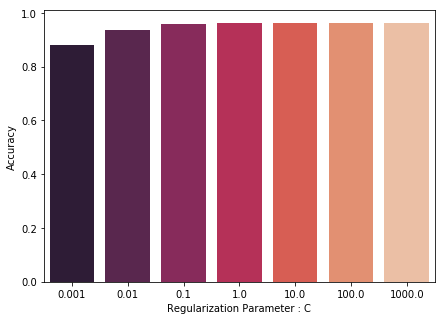

In [10]:
import seaborn as sns
plt.figure(figsize=(7,5))
plt.xlabel('Regularization Parameter : C')
plt.ylabel('Accuracy')
sns.barplot([0.001,0.01,0.1,1,10,100,1000],test_scores,palette="rocket")

## 4. Training model with C = 10

In [11]:
lr = LogisticRegression(C=10)
lr.fit(X_train,Y_train_encoded)
print ("Logistic Regression Train Accuracy : {}".format(accuracy_score(Y_train_encoded,lr.predict(X_train))))
print ("Logistic Regression Test Accuracy : {}".format(accuracy_score(Y_test_encoded,lr.predict(X_test))))

Logistic Regression Train Accuracy : 0.995375408052
Logistic Regression Test Accuracy : 0.962334577536


## 5. PCA

In [12]:
from sklearn.decomposition import PCA
X_train = train.iloc[:,:-2]
X_test = test.iloc[:,:-2]
pca = PCA(n_components=10)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train.shape,X_train_pca.shape)
print(X_test.shape,X_test_pca.shape)

((7352, 561), (7352, 10))
((2947, 561), (2947, 10))


In [13]:
lr = LogisticRegression().fit(X_train_pca,Y_train_encoded)
print ("Logistic Regression Train Accuracy : {}".format(accuracy_score(Y_train_encoded,lr.predict(X_train_pca))))
print ("Logistic Regression Test Accuracy : {}".format(accuracy_score(Y_test_encoded,lr.predict(X_test_pca))))

Logistic Regression Train Accuracy : 0.881936887922
Logistic Regression Test Accuracy : 0.86494740414


## 6. Selecting the number of components

In [14]:
r = range(10,251,10)
pca_scores = []
for i in r:
    pca = PCA(n_components=i,random_state=0).fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    lr = LogisticRegression().fit(X_train_pca,Y_train_encoded)
    acc = accuracy_score(Y_test_encoded,lr.predict(X_test_pca))
    pca_scores.append(acc)
    print("{} : {}".format(i,acc))

10 : 0.86494740414
20 : 0.891414998303
30 : 0.911096029861
40 : 0.922972514421
50 : 0.927044451985
60 : 0.940278249067
70 : 0.946725483543
80 : 0.9440108585
90 : 0.944689514761
100 : 0.951476077367
110 : 0.953851374279
120 : 0.953172718018
130 : 0.9552086868
140 : 0.95486935867
150 : 0.957583983712
160 : 0.958941296233
170 : 0.960977265015
180 : 0.961316593146
190 : 0.961655921276
200 : 0.963352561927
210 : 0.961995249406
220 : 0.961655921276
230 : 0.962334577536
240 : 0.961316593146
250 : 0.961995249406


([<matplotlib.axis.XTick at 0x7f58bc8df950>,
 <a list of 25 Text xticklabel objects>)

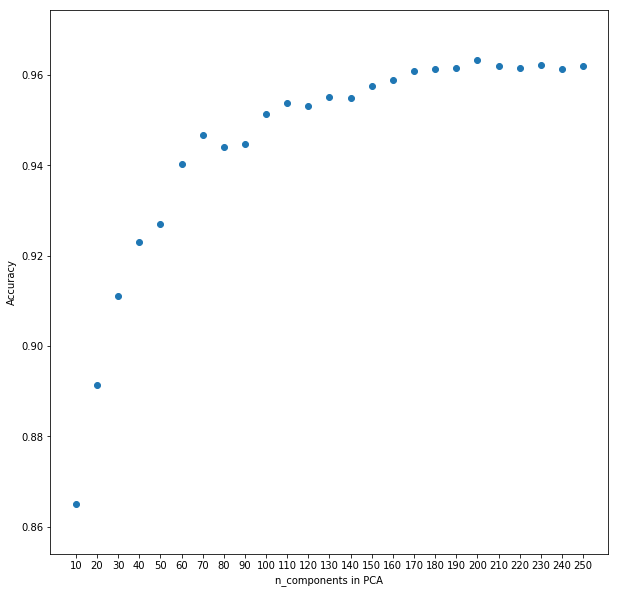

In [15]:
plt.figure(figsize=(10,10))
plt.xlabel('n_components in PCA')
plt.ylabel('Accuracy')
plt.scatter(range(10,260,10),pca_scores)
plt.xticks(range(10,260,10))

In [16]:
pca = PCA(n_components=200,random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
lr = LogisticRegression(random_state=0).fit(X_train_pca,Y_train_encoded)
print ("Logistic Regression Train Accuracy : {}".format(accuracy_score(Y_train_encoded,lr.predict(X_train_pca))))
print ("Logistic Regression Test Accuracy : {}".format(accuracy_score(Y_test_encoded,lr.predict(X_test_pca))))

Logistic Regression Train Accuracy : 0.990206746464
Logistic Regression Test Accuracy : 0.963352561927


## 7. Selecting the value of regularization parameter, C

In [17]:
pca_test_scores = []
for i in [0.001,0.01,0.1,1,10,100,1000]:
    lr = LogisticRegression(C=i,random_state=0)
    lr.fit(X_train_pca,Y_train_encoded)
    acc = accuracy_score(Y_test_encoded,lr.predict(X_test_pca))
    pca_test_scores.append(acc)
    print("{} : {}".format(i,acc))

0.001 : 0.892093654564
0.01 : 0.939938920937
0.1 : 0.95554801493
1 : 0.963352561927
10 : 0.961995249406
100 : 0.964370546318
1000 : 0.963691890058


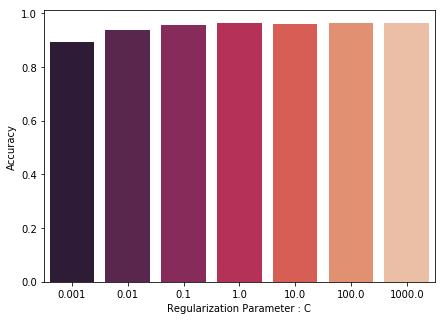

In [18]:
plt.figure(figsize=(7,5))
plt.xlabel('Regularization Parameter : C')
plt.ylabel('Accuracy')
sns.barplot([0.001,0.01,0.1,1,10,100,1000],pca_test_scores,palette="rocket")

## 8. Training model with C = 100

In [19]:
lr = LogisticRegression(C=100,random_state=0)
lr.fit(X_train_pca,Y_train_encoded)
print ("Logistic Regression Train Accuracy : {}".format(accuracy_score(Y_train_encoded,lr.predict(X_train_pca))))
print ("Logistic Regression Test Accuracy : {}".format(accuracy_score(Y_test_encoded,lr.predict(X_test_pca))))

Logistic Regression Train Accuracy : 0.995511425462
Logistic Regression Test Accuracy : 0.964370546318


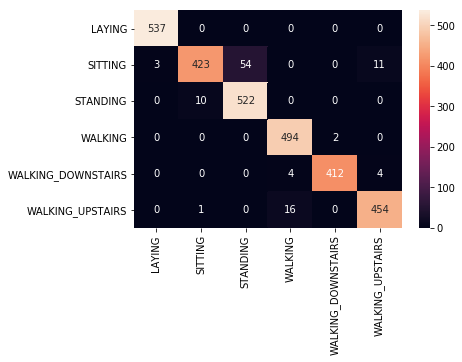

In [20]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score
sns.heatmap(data=confusion_matrix(Y_test_encoded,lr.predict(X_test_pca)),
            fmt ='.0f',
            annot=True,
            xticklabels=np.unique(Y_test),
            yticklabels=np.unique(Y_test))

In [22]:
print ("Accuracy Score : {}".format(accuracy_score(Y_test_encoded,lr.predict(X_test_pca))))
print ("Precision Score: {}".format(precision_score(Y_test_encoded,lr.predict(X_test_pca),average='macro')))
print ("Recall Acore : {}".format(recall_score(Y_test_encoded,lr.predict(X_test_pca),average='macro')))
print ("F1 Score : {}".format(f1_score(Y_test_encoded,lr.predict(X_test_pca),average='macro')))

Accuracy Score : 0.964370546318
Precision Score: 0.96660407603
Recall Acore : 0.963922806743
F1 Score : 0.964372034557


In [23]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_encoded,lr.predict(X_test_pca)))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00       537
          1       0.97      0.86      0.91       491
          2       0.91      0.98      0.94       532
          3       0.96      1.00      0.98       496
          4       1.00      0.98      0.99       420
          5       0.97      0.96      0.97       471

avg / total       0.97      0.96      0.96      2947

